In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat May  4 15:56:26 2019

@author: irene
"""

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange


In [2]:
conn = sqlite3.connect("C:/Users/irene/Desktop/TDI/wildfire.sqlite")
wildfire = pd.read_sql_query("select * from Fires", conn)


In [3]:
column_names = wildfire.columns
column_names = column_names.str.lower()
wildfire.columns = column_names

The following codes conduct brief exploratory analysis on wildfires. We will look at:
- Which year has the highest number of wildfires?
- What states have the most wildfires during the period 1992-2015?
- What is the most common reason of a wildfire?

In [4]:
wildfire.fire_year.value_counts()

2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: fire_year, dtype: int64

In [5]:
wildfire.state.value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: state, dtype: int64

California, Georgia, Texas, and North Carolina are the states that suffered the most from wildfires. (Not surprising, since these states have a lot of trees!)

In [6]:
wildfire.stat_cause_descr.value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: stat_cause_descr, dtype: int64

From the above statistics, it looks like that 'Debris Burning' is the reason that caused the most wildfires. However, is it also the reason that caused the most burned acres? This question can be answered if we look closer at the statistics on burned acreas, which are indicated by column 'fire_size'.

In [7]:
# Calculate burned acres per year
burned_acres = wildfire.groupby('fire_year').sum()[['fire_size']] 
burned_acres.sort_values(by = 'fire_size', ascending = False)

,fire_size
fire_year,
2015,1.021827e+07
2006,1.004350e+07
2005,9.665105e+06
2011,9.623597e+06
2012,9.439888e+06
2007,9.265429e+06
2004,8.234208e+06
2000,7.639499e+06
2002,6.803258e+06


In [8]:
# Calculate burned acres per cause
burned_causes = wildfire.groupby('stat_cause_descr').sum()[['fire_size']] 
burned_causes = burned_causes.sort_values(by = 'fire_size', ascending = False)
burned_causes = burned_causes[:6] # Select the top 6 causes

Text(0.5, 1.0, 'Top Six Reasons for Burned Acres from Wildfires 1992-2015')

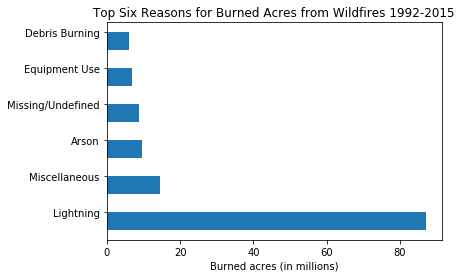

In [9]:
x_lables = ['Lightning', 'Miscellaneous', 'Arson', 'Missing/Undefined',
       'Equipment Use','Debris Burning']

bar_widths = burned_causes['fire_size'].values/1000000 # Convert burned acres to millions
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

fig, ax = plt.subplots()
ax.barh(bar_positions,bar_widths,0.5)
ax.set_yticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_yticklabels(x_lables)

ax.set_xlabel("Burned acres (in millions)")
ax.set_title("Top Six Reasons for Burned Acres from Wildfires 1992-2015")

From the bar chart, we can see the top 6 reasons for burned acres caused by wildfires. Now, we will look these data by years and see if there is any trend.

In [10]:
burned_causes_by_year = wildfire.groupby(['stat_cause_descr','fire_year']).sum()[['fire_size']] 

In [11]:
burned_causes_by_year = burned_causes_by_year.unstack(level=-1)
burned_causes_by_year.columns = burned_causes_by_year.columns.droplevel()
burned_causes_by_year = burned_causes_by_year/1000

In [12]:
burned_causes_by_year.index

Index(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'],
      dtype='object', name='stat_cause_descr')

In [13]:
burned_causes_by_year = burned_causes_by_year.loc[['Arson', 'Debris Burning', 'Equipment Use',
       'Lightning', 'Miscellaneous', 'Missing/Undefined']]

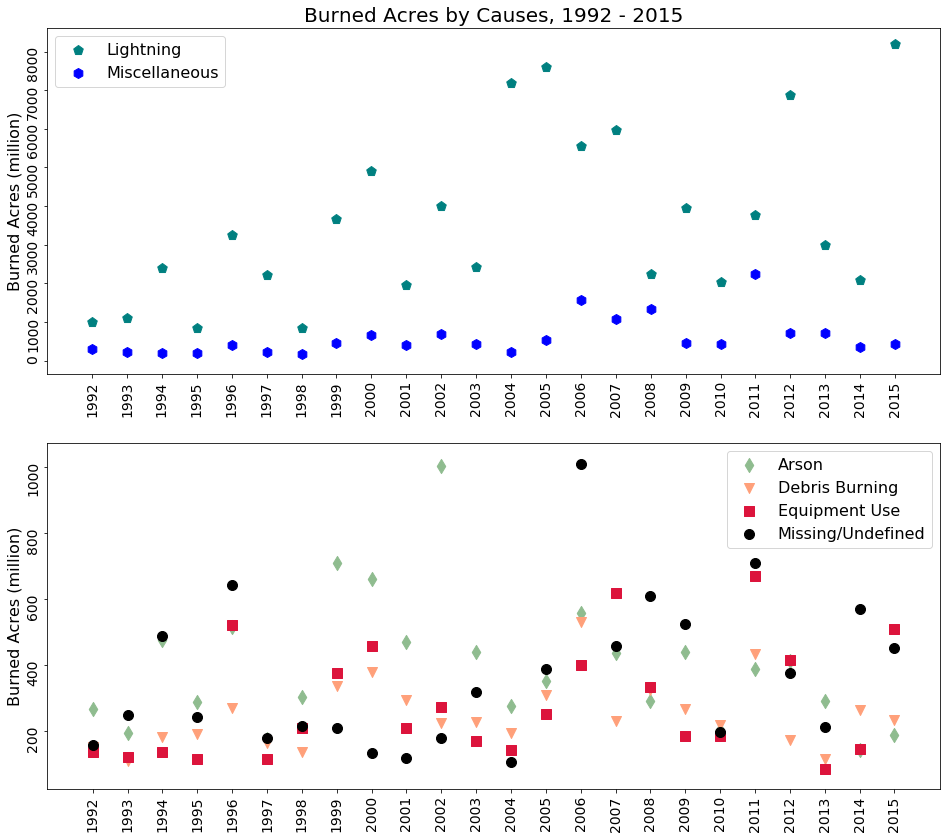

In [14]:
y = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211)

ax1.scatter(y, burned_causes_by_year.loc['Arson'], s=100, c='darkseagreen', marker="d", label='Arson')
ax1.scatter(y, burned_causes_by_year.loc['Debris Burning'], s=100, c='lightsalmon', marker="v", label='Debris Burning')
ax1.scatter(y, burned_causes_by_year.loc['Equipment Use'], s=100, c='crimson', marker="s", label='Equipment Use')
ax1.scatter(y, burned_causes_by_year.loc['Missing/Undefined'], s=100, c='k', marker='o', label='Missing/Undefined')
ax2.scatter(y, burned_causes_by_year.loc['Lightning'], s=100, c='teal', marker='p', label='Lightning')
ax2.scatter(y, burned_causes_by_year.loc['Miscellaneous'], s=100, c='b', marker='h', label='Miscellaneous')

ax1.set_ylabel('Burned Acres (million)',fontsize = 16)
ax1.legend(labels=['Arson', 'Debris Burning','Equipment Use','Missing/Undefined'],fontsize = 16)
ax1.set_xticks(y)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_title('Burned Acres by Causes, 1992 - 2015',fontsize = 20)
ax2.set_ylabel('Burned Acres (million)',fontsize = 16)
ax2.legend(labels=['Lightning','Miscellaneous'],fontsize = 16)
ax2.set_xticks(y)
ax2.tick_params(labelsize=14,rotation = 90)
plt.show()

From the scatter plot, we can see that there might be some linear relationship between burned acres caused by lightning related wildfires and years. However, the relationship is not 100% clear and may require deeper analysis. A stacked bar chart could be more straightforward in presenting the descriptive trends.

### Final version of the 1st plot:

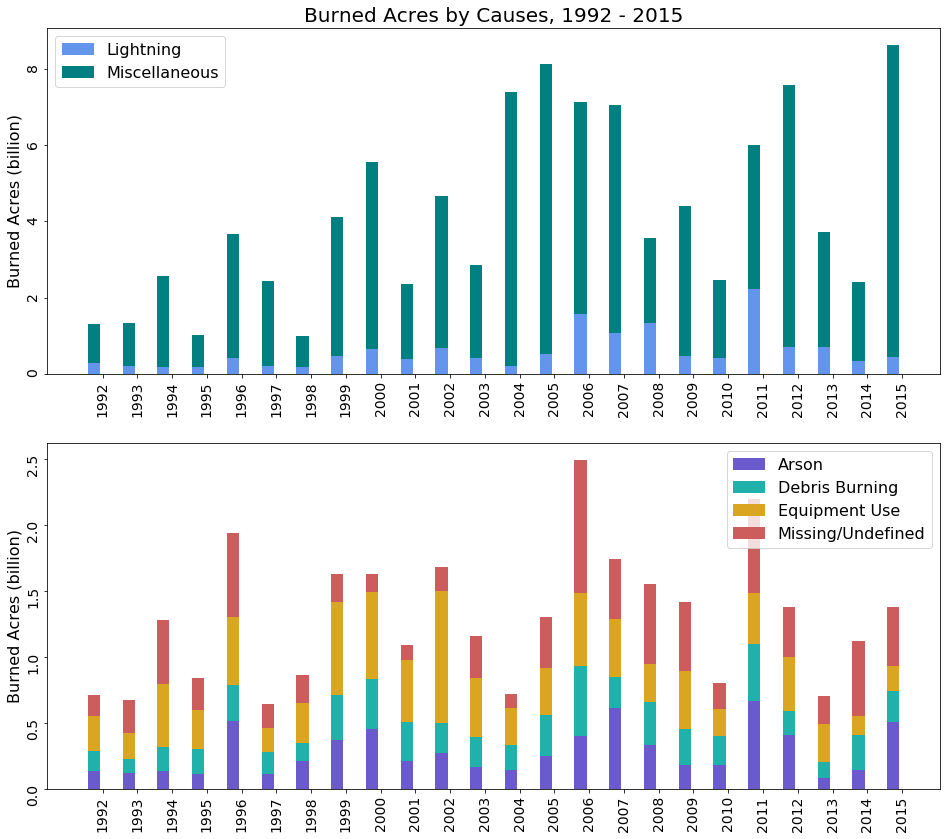

In [15]:
y = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

bar_height1 = burned_causes_by_year.loc['Lightning'].values/1000 
bar_height2 = burned_causes_by_year.loc['Miscellaneous'].values/1000 
bar_height3 = burned_causes_by_year.loc['Debris Burning'].values/1000 
bar_height4 = burned_causes_by_year.loc['Equipment Use'].values/1000 
bar_height5 = burned_causes_by_year.loc['Missing/Undefined'].values/1000 
bar_height6 = burned_causes_by_year.loc['Arson'].values/1000 

plt_index = arange(24) + 0.75
tick_positions= range(1,25)

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(plt_index, bar_height2, width = 0.35, color = 'cornflowerblue')
ax1.bar(plt_index, bar_height1, width = 0.35, bottom = bar_height2, color = 'teal')

ax2.bar(plt_index, bar_height4, width = 0.35, color = 'slateblue')
ax2.bar(plt_index, bar_height3, width = 0.35, bottom = bar_height4, color = 'lightseagreen')
ax2.bar(plt_index, bar_height6, width = 0.35, bottom = bar_height3 +bar_height4 , color = 'goldenrod')
ax2.bar(plt_index, bar_height5, width = 0.35, bottom = bar_height6 +bar_height3 + bar_height4, color = 'indianred')

ax1.set_title('Burned Acres by Causes, 1992 - 2015',fontsize = 20)
ax1.set_ylabel('Burned Acres (billion)',fontsize = 16)
ax1.legend(labels=['Lightning','Miscellaneous'],fontsize = 16)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(y)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_ylabel('Burned Acres (billion)',fontsize = 16)
ax2.legend(labels=['Arson', 'Debris Burning','Equipment Use','Missing/Undefined'],fontsize = 16)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(y)
ax2.tick_params(labelsize=14,rotation = 90)
plt.show()

The above figure shows that wildfires that burned the most acres are usually cuased natural reason: lighting. However, if we look at other human-related reasons, we can see a lot of wildfires that burned much acres have missing reasons. Arson is the top human-related reasons for wildfires burnt the most acres.



In [16]:
wildfire['fire_size'].quantile(0.994) 

1000.0

In [17]:
wildfire['fire_size'].quantile(0.990) 

460.0

From the quantiles, we can tell that the distribution of the size of wildfire is very skewed. We will then focus on the extremely destructive wildfires, which had burned more than 1000 acres of land. 

In [18]:
severe_wildfire = wildfire[wildfire['fire_size'] > 1000]
severe_wildfire['state'].value_counts()

CA    1116
ID    1079
AK    1056
TX     914
NV     694
NM     684
OR     602
MT     586
AZ     572
FL     500
UT     493
OK     482
WA     381
WY     304
SD     236
CO     220
KS     151
MN     143
KY      96
LA      88
NE      86
WV      80
ND      59
GA      51
VA      48
HI      48
TN      47
NC      47
MS      44
AL      32
AR      30
MO      27
NJ      17
SC      17
MI      14
MD      12
WI       8
PA       4
PR       4
IA       4
NY       3
OH       2
DE       2
ME       1
IL       1
IN       1
CT       1
Name: state, dtype: int64

From above, we can see CA, ID, AK and TX are the four states that have the most severe wildfires. The following codes produce a detailed look on how many severe wildfires these states have per year and how much acres were burned each year.

In [19]:
severe_wildfire_by_state_count = severe_wildfire.groupby(['state','fire_year']).count()[['objectid']]
severe_wildfire_by_state_count = severe_wildfire_by_state_count.unstack(level=-1)
severe_wildfire_by_state_count.columns = severe_wildfire_by_state_count.columns.droplevel()

In [20]:
severe_wildfire_by_state_count.dropna()

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,11.0,44.0,32.0,11.0,38.0,44.0,5.0,41.0,24.0,8.0,...,11.0,41.0,12.0,64.0,72.0,23.0,27.0,67.0,6.0,208.0
AZ,8.0,31.0,44.0,42.0,13.0,1.0,4.0,14.0,15.0,6.0,...,31.0,17.0,24.0,42.0,16.0,39.0,30.0,19.0,24.0,27.0
CA,42.0,32.0,56.0,37.0,89.0,33.0,22.0,72.0,23.0,38.0,...,67.0,46.0,122.0,43.0,20.0,28.0,40.0,31.0,34.0,53.0
FL,13.0,7.0,8.0,7.0,11.0,10.0,49.0,28.0,35.0,59.0,...,27.0,39.0,20.0,27.0,11.0,40.0,18.0,9.0,16.0,21.0
ID,46.0,1.0,52.0,36.0,72.0,10.0,29.0,44.0,98.0,32.0,...,87.0,97.0,26.0,7.0,43.0,41.0,88.0,51.0,19.0,65.0
MT,9.0,1.0,44.0,6.0,22.0,3.0,16.0,17.0,63.0,15.0,...,52.0,42.0,14.0,9.0,5.0,20.0,79.0,11.0,7.0,44.0
NM,13.0,43.0,79.0,25.0,25.0,21.0,19.0,17.0,51.0,17.0,...,56.0,25.0,51.0,40.0,19.0,97.0,8.0,5.0,7.0,7.0
NV,13.0,12.0,27.0,18.0,61.0,7.0,17.0,90.0,62.0,48.0,...,89.0,51.0,8.0,3.0,5.0,34.0,48.0,21.0,10.0,4.0
OR,21.0,2.0,33.0,10.0,42.0,5.0,16.0,18.0,30.0,33.0,...,42.0,35.0,22.0,12.0,15.0,38.0,31.0,28.0,56.0,30.0


In [21]:
severe_wildfire_by_state = severe_wildfire.groupby(['state','fire_year']).sum()[['fire_size']] 
severe_wildfire_by_state = severe_wildfire_by_state.unstack(level=-1)
severe_wildfire_by_state.columns = severe_wildfire_by_state.columns.droplevel()
severe_wildfire_by_state = severe_wildfire_by_state/1000

In [22]:
severe_wildfire_by_state.dropna()

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,132.5570,665.3605,241.4469,37.6100,588.3509,2003.2280,116.02100,990.20000,748.467400,214.9750,...,249.03570,610.53770,82.77770,2938.0009,1116.8144,282.0750,290.49580,1304.95170,227.71510,5103.35879
AZ,14.4660,124.2831,176.0080,200.6104,165.4311,1.9060,12.18900,58.56060,68.192000,20.9920,...,146.55040,97.18300,98.08073,192.2095,72.4361,1013.9365,205.07770,89.21100,188.17900,142.34100
CA,209.7670,248.9100,334.0181,147.0700,592.8130,273.1850,110.20000,733.52040,210.941200,294.8210,...,735.48830,984.09526,1351.40100,416.6100,81.7010,141.4618,721.89740,537.98825,516.66220,810.25957
FL,25.3000,20.2945,44.3200,23.4080,37.9540,69.7760,287.07800,322.90400,123.709000,318.0709,...,179.70500,455.42290,134.84440,87.5068,33.1190,242.3057,90.22700,44.19100,123.86100,120.86500
ID,643.4350,2.8060,678.8812,236.2330,842.2135,24.7500,127.01170,372.65640,1310.339600,153.4411,...,869.02200,2145.56876,155.27020,10.5920,618.9814,384.2850,1725.37400,701.46300,178.89600,761.34850
MT,21.1090,7.6800,219.9020,12.2020,178.4303,5.2855,83.12739,93.83805,776.824000,147.3940,...,827.47500,714.93324,148.61063,42.0850,43.3752,128.0935,967.49350,64.79090,19.36300,319.99840
NM,84.1500,260.7780,328.2550,109.4290,133.5730,147.1150,67.12300,62.42900,447.636899,52.4275,...,502.65300,108.29300,341.41500,378.2332,104.8490,1076.0123,354.32400,280.58100,36.48600,41.09300
NV,82.7260,48.0830,183.0380,103.5010,595.1515,31.2370,77.84210,1740.35220,627.048200,572.0079,...,1286.12420,928.92780,70.49370,23.4845,14.6669,407.5436,435.17838,167.15137,64.63370,18.13820
OR,94.2391,3.9600,247.5842,45.0390,558.4476,12.9243,67.46950,46.84540,348.915500,363.5679,...,474.67730,543.71100,224.39850,75.0866,80.0284,207.8280,1516.23330,302.77760,914.93241,558.54070


### Final version of the 2nd plot:

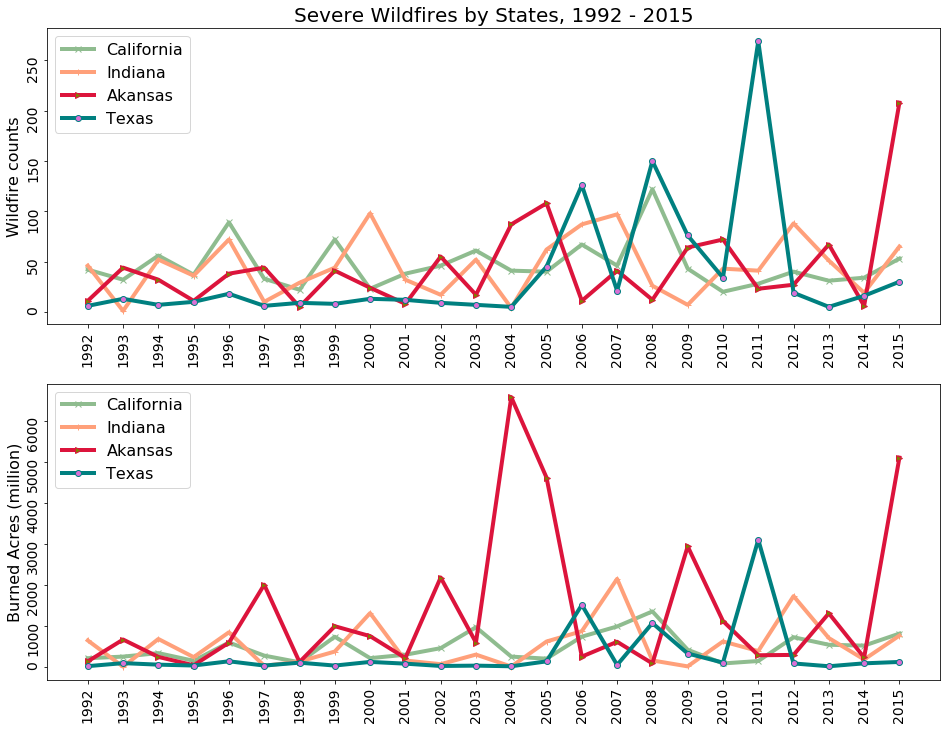

In [23]:
year = range(1992,2016)
ca = severe_wildfire_by_state.loc["CA"]
idn = severe_wildfire_by_state.loc["ID"]
ak = severe_wildfire_by_state.loc["AK"]
tx = severe_wildfire_by_state.loc["TX"]

ca_count = severe_wildfire_by_state_count.loc["CA"]
idn_count = severe_wildfire_by_state_count.loc["ID"]
ak_count = severe_wildfire_by_state_count.loc["AK"]
tx_count = severe_wildfire_by_state_count.loc["TX"]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211)

ax1.plot(year, ca, marker='x', markerfacecolor='maroon', markersize=6, color='darkseagreen', linewidth=4)
ax1.plot(year, idn, marker='+', markerfacecolor='coral', markersize=6, color='lightsalmon', linewidth=4)
ax1.plot(year, ak, marker='>', markerfacecolor='olive', markersize=6, color='crimson', linewidth=4)
ax1.plot(year, tx, marker='o', markerfacecolor='orchid', markersize=6, color='teal', linewidth=4)

ax2.plot(year, ca_count, marker='x', markerfacecolor='maroon', markersize=6, color='darkseagreen', linewidth=4)
ax2.plot(year, idn_count, marker='+', markerfacecolor='coral', markersize=6, color='lightsalmon', linewidth=4)
ax2.plot(year, ak_count, marker='>', markerfacecolor='olive', markersize=6, color='crimson', linewidth=4)
ax2.plot(year, tx_count, marker='o', markerfacecolor='orchid', markersize=6, color='teal', linewidth=4)


ax1.set_ylabel('Burned Acres (million)',fontsize = 16)
ax1.legend(labels=['California','Indiana','Akansas','Texas'],fontsize = 16)
ax1.set_xticks(y)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_ylabel('Wildfire counts',fontsize = 16)
ax2.legend(labels=['California','Indiana','Akansas','Texas'],fontsize = 16)
ax2.set_xticks(y)
ax2.tick_params(labelsize=14,rotation = 90)


ax2.set_title('Severe Wildfires by States, 1992 - 2015',fontsize = 20)

plt.show()
